In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# logistic regression
解决一些分类问题，把因变量落到0-1之间

$g(z) = \frac{1}{1+e^{-z}}$

In [2]:
def sigmoid(z, lambdas=1):
   return 1 / (1 + np.exp(-lambdas * z))

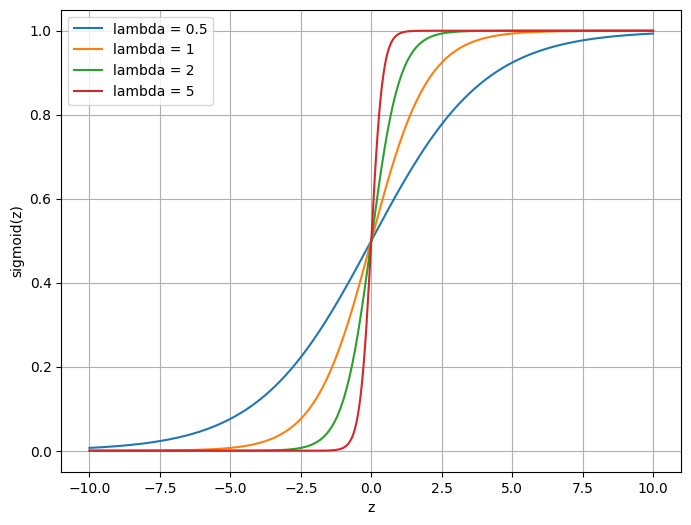

In [3]:
z = np.linspace(-10, 10, 400)
y = sigmoid(z)

lambdas_values = [0.5, 1, 2, 5]

plt.figure(figsize=(8, 6))

for lam in lambdas_values:
    y = sigmoid(z, lambdas=lam)
    plt.plot(z, y, label=f"lambda = {lam}")

plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.legend()
plt.grid(True)
plt.show()

# Decision Boundary 
$h_{\theta}(x) = g(\theta^T X)$

$g(z) = \frac{1}{1+e^{-z}}$

当$g(z)$大于0.5可以判定为一类，小于0.5可以判定为另一类, 等于0.5在分界线上。

现在假设一个模型是：
$h_{\theta}(x) = g(\theta _0 + \theta _1 x_1 + \theta _2 x_2)$

(也可以是任意其他的函数类型)


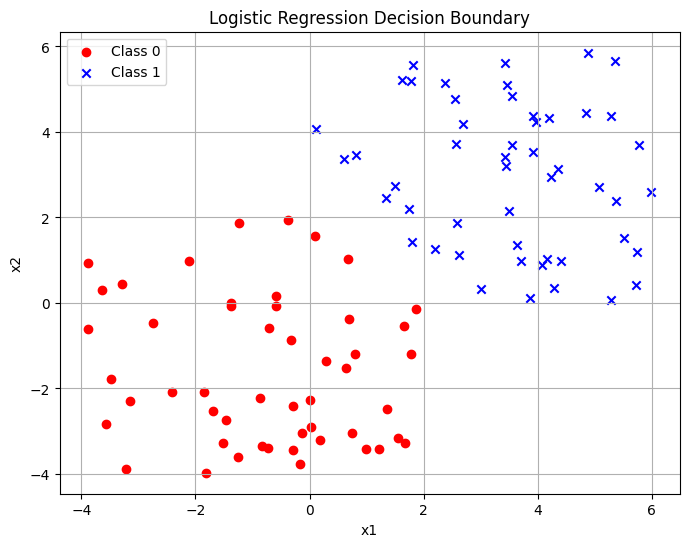

In [4]:
# 造个理论数据
theta0 = -3
theta1 = 1
theta2 = 1

np.random.seed(0)
num_samples = 50

x1_class0 = np.random.uniform(-4, 2, num_samples)
x2_class0 = np.random.uniform(-4, 2, num_samples)

x1_class1 = np.random.uniform(0, 6, num_samples)
x2_class1 = np.random.uniform(0, 6, num_samples)

for i in range(num_samples):
    if theta0 + theta1 * x1_class0[i] + theta2 * x2_class0[i] >= 0:
        x2_class0[i] -= 2  # 将类别 0 的点下移
    if theta0 + theta1 * x1_class1[i] + theta2 * x2_class1[i] <= 0:
        x2_class1[i] += 2  # 将类别 1 的点上移

plt.figure(figsize=(8, 6))
plt.scatter(x1_class0, x2_class0, color='red', marker='o', label="Class 0")
plt.scatter(x1_class1, x2_class1, color='blue', marker='x', label="Class 1")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

把x1与x2混合在一起，带入sigmoid函数得到y值，还是取阈值0.5


In [5]:
x1 = np.concatenate((x1_class0, x1_class1))
x2 = np.concatenate((x2_class0, x2_class1))
y = sigmoid(theta0 + theta1 * x1 + theta2 * x2)

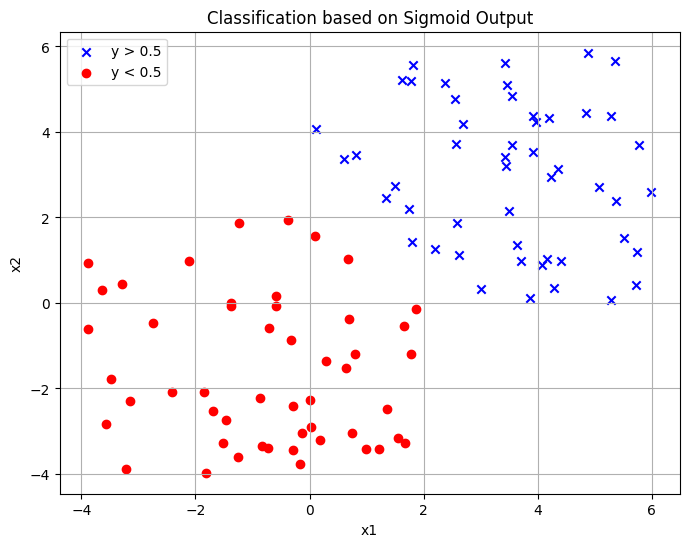

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(x1[y > 0.5], x2[y > 0.5], color='blue', marker='x', label='y > 0.5')
plt.scatter(x1[y < 0.5], x2[y < 0.5], color='red', marker='o', label='y < 0.5')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Classification based on Sigmoid Output')
plt.legend()
plt.grid(True)
plt.show()

以上是已经知道参数的情况，但现实中如何估计这些位置参数呢？
# cost function of logisctic regression

$h_{\theta}(x) = \frac{1}{1+e^{- \theta^T x}}$

如果代价函数是所有模型误差的平方和， 带入$h_{\theta}(x)$，代价函数将是一个非凸函数，可能有无数个局部最优，梯度下降会有困难。所以定义：

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \text{Cost}(h_{\theta}(x^{(i)}), y^{(i)}), \text{其中}
$$

$$
\text{Cost}(h_{\theta}(x), y) = 
\begin{cases} 
-\log(h_{\theta}(x)) & \text{if } y = 1 \\
-\log(1 - h_{\theta}(x)) & \text{if } y = 0 
\end{cases}
$$

$$
h_{\theta}(x) = \frac{1}{1+e^{- \theta^T x}}
$$


这样构建的 $\text{Cost}(h_{\theta}(x), y)$ 函数的特点是：当实际的 $y = 1$ 且 $h_{\theta}(x)$ 也为 1 时误差为 0，当 $y = 1$ 但 $h_{\theta}(x)$ 不为 1 时误差随着 $h_{\theta}(x)$ 变小时而变大；当实际的 $y = 0$ 且 $h_{\theta}(x)$ 也为 0 时代价为 0，当 $y = 0$ 但 $h_{\theta}(x)$ 不为 0 时误差随着 $h_{\theta}(x)$ 的变大而变大。

将构建的 $\text{Cost}(h_{\theta}(x), y)$ 简化如下：

$$
\text{Cost}(h_{\theta}(x), y) = -y \times \log(h_{\theta}(x)) - (1-y) \times \log(1-h_{\theta}(x))
$$

带入代价函数得到：

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[-y^{(i)} \log(h_{\theta}(x^{(i)})) - (1-y^{(i)}) \log(1-h_{\theta}(x^{(i)}))\right]
$$

即：

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1-y^{(i)}) \log(1-h_{\theta}(x^{(i)})) \right]
$$


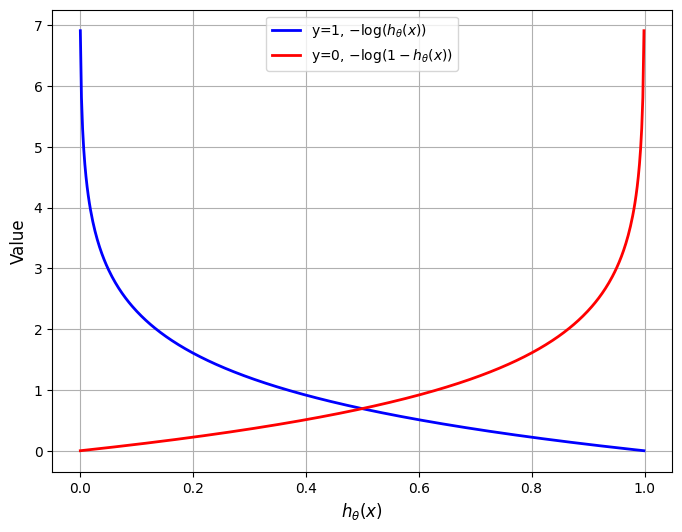

In [7]:
y = np.linspace(0.001, 0.999, 500)

# 计算函数值
neg_log_y = -np.log(y)
neg_log_1_minus_y = -np.log(1 - y)

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(y, neg_log_y, label=r'y=1, $- \log(h_{\theta}(x))$', color='blue', linewidth=2)
plt.plot(y, neg_log_1_minus_y, label=r'y=0, $- \log(1-h_{\theta}(x))$', color='red', linewidth=2)
plt.xlabel(r"$h_{\theta}(x)$", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

类似之前的做法，用梯度下降求解参数

In [8]:
def cost_function(y, X, theta):
    thetam = np.matrix(theta)
    X = np.matrix(X)
    hx = sigmoid(thetam * X)
    y = np.matrix(y)
    c = -np.multiply(y,  np.log(hx)) - np.multiply((1 - y) , np.log(1-hx))
    return np.sum(c) / len(y)

def grad(y, X, theta, types=0):
    x1 = X[1]
    x2 = X[2]
    thetam = np.matrix(theta)
    X = np.matrix(X)
    hx = sigmoid(thetam * X)
    hx = np.asarray(hx)[0]
    g = (hx - y) / len(y)
    if types == 0:
        return sum(g)
    elif types == 1:
        return sum(g * x1)
    elif types == 2:
        return sum(g * x2)

In [ ]:
x1 = np.concatenate((x1_class0, x1_class1))
x2 = np.concatenate((x2_class0, x2_class1)) 
y = sigmoid(-3 + x1 + x2)
x0 = np.full(len(x1),1)
X = np.array([x0, x1, x2])

In [10]:
# 过程与week1类似， 使用向量计算
theta = np.array([0,0,0])
alpha = 0.1
max_iter_num = 10000
tol = 1e-6
cost = cost_function(y, X, theta)
num = 0
cost_diff = []
for i in range(max_iter_num):
    grad0 = grad(y, X, theta, types=0)
    grad1 = grad(y, X, theta, types=1)
    grad2 = grad(y, X, theta, types=2)

    theta = theta - np.array([grad0,grad1,grad2])

    c = cost_function(y, X, theta)
    cost_diff.append(cost - c)
    if abs(cost - c) < tol:
        break
    cost = c
    num += 1
    
print("\n最终优化参数:", theta)
print("\n最终迭代次数:", num)


最终优化参数: [-2.9912366   0.99796597  0.99811037]

最终迭代次数: 449


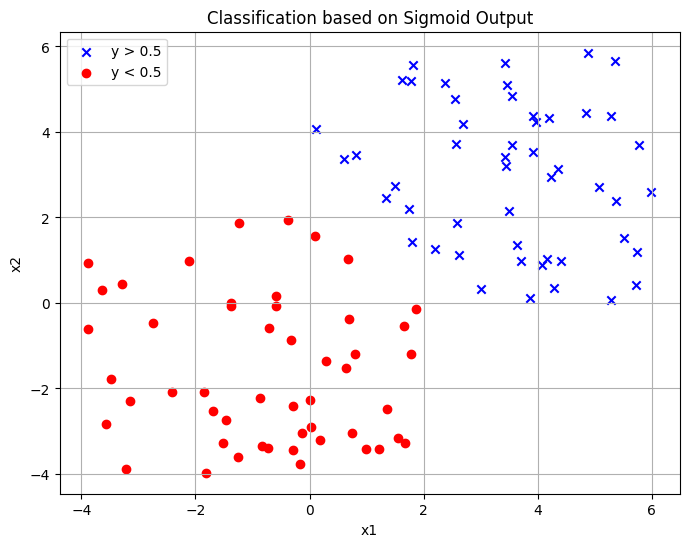

In [11]:
y_hat = sigmoid(np.matrix(theta)*X)
y_hat = np.asarray(y_hat)[0]
plt.figure(figsize=(8, 6))
plt.scatter(x1[y_hat > 0.5], x2[y_hat > 0.5], color='blue', marker='x', label='y > 0.5')
plt.scatter(x1[y_hat < 0.5], x2[y_hat < 0.5], color='red', marker='o', label='y < 0.5')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Classification based on Sigmoid Output')
plt.legend()
plt.grid(True)
plt.show()

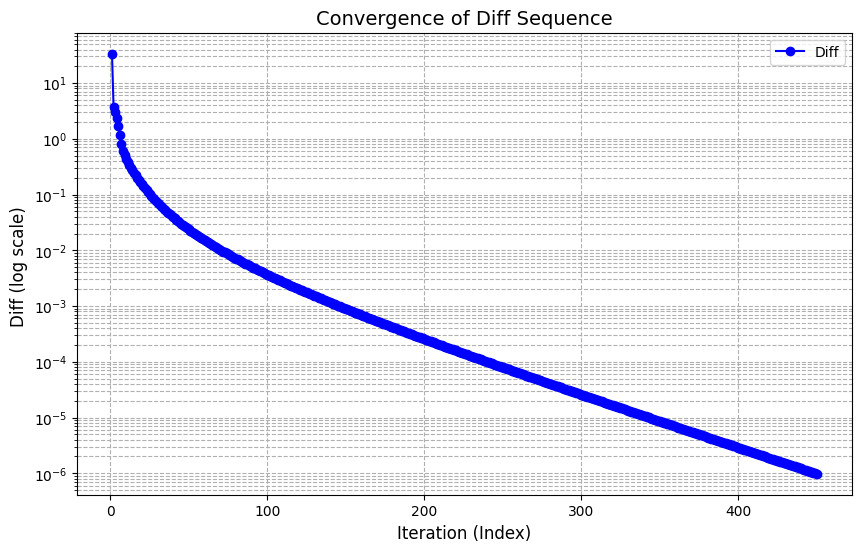

In [12]:
plt.figure(figsize=(10, 6))
iterations = np.arange(1, len(cost_diff) + 1)
plt.plot(iterations, cost_diff, marker='o', linestyle='-', color='b', label='Diff')
plt.yscale('log')  # 纵轴对数坐标
plt.xlabel('Iteration (Index)', fontsize=12)
plt.ylabel('Diff (log scale) ', fontsize=12)
plt.title('Convergence of Diff Sequence', fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

得到的参数还行，但在规定的迭代次数下，优化一直没有收敛，精度不够。
# Advanced Optimization 高级优化
共轭梯度法 BFGS (变尺度法) 和L-BFGS (限制变尺度法) 。[TODO]

但是理论上，从逻辑回归的这个例子看出，**可以自己设计任何代价函数达到目的。**

# Regularization正则化
主要解决过拟合问题。代价函数可以对一些高次项的参数的惩罚，避免函数过拟合。
$$
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2^2 + \theta_3 x_3^3 + \theta_4 x_4^4
$$

$$
J(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 \right] + \lambda \sum_{j=1}^{n} \theta_j^2
$$

一般不对$\theta _0$惩罚，也可以从3,4开始惩罚。其中$\lambda$称为正则化参数（Regularization Parameter），所以在正则化表达下，代价函数在梯度下降时，对$\theta _0$和$\theta _j$是不同的。

$$
\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( (h_\theta(x^{(i)}) - y^{(i)}) x_0^{(i)} \right)
$$

$$
\theta_j := \theta_j - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} \left( (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j \right]
$$